In [1]:
#importing dependencies
import numpy as np
from sklearn import tree
import matplotlib.pyplot as plt
%matplotlib inline

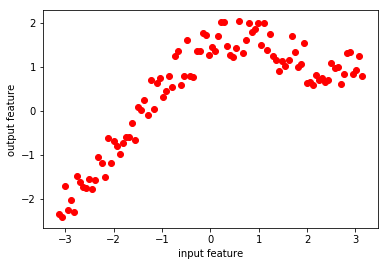

In [2]:
#preparing data
#Generationg radom points on x-axis
number_of_sample = 100
x = np.linspace(-np.pi,np.pi,number_of_sample)
y = 0.5*x + np.cos(x)+np.random.random(x.shape)
#print(x.shape[0])
#print("Input Feature",x)
#print("Output Feature",y)
plt.scatter(x,y,color="red")#plot y v/s x in dots
plt.xlabel("input feature")
plt.ylabel("output feature")
plt.show()

In [5]:
#Spliting the data into traning,validation and test set
random_indices = np.random.permutation(number_of_sample)

#traning set
x_train = x[random_indices[:70]]
y_train = y[random_indices[:70]]

#validation set
x_val = x[random_indices[70:85]]
y_val = y[random_indices[70:85]]

#test set
x_test = x[random_indices[85:]]
y_test = y[random_indices[85:]]

print(x_train)

[ 3.14159265  0.28559933 -0.28559933 -0.41253237 -2.9511931   1.04719755
 -0.79333148 -1.87226229  2.9511931  -0.92026451  1.61839622 -1.74532925
 -2.76079354  2.50692747  2.82426006 -0.72986496  0.09519978  2.63386051
 -1.93572881  1.74532925  0.98373103  1.23759711 -0.34906585 -2.63386051
  2.06266184  0.47599889 -2.82426006 -1.11066407 -2.31652792 -0.98373103
  0.60293192 -1.68186273  2.76079354 -3.01465962 -0.22213281  1.11066407
 -2.57039399  0.92026451 -0.66639844  1.99919533 -1.61839622  2.57039399
  0.41253237  1.30106362  2.37999443  2.18959488 -2.18959488 -2.50692747
  3.07812614  2.44346095  1.80879577  0.53946541  3.01465962 -3.14159265
 -3.07812614  2.88772658 -2.44346095  0.22213281  0.856798    0.34906585
  2.2530614   0.03173326  2.69732703  0.79333148 -0.1586663   2.12612836
 -1.49146318 -0.09519978 -2.88772658  0.72986496]


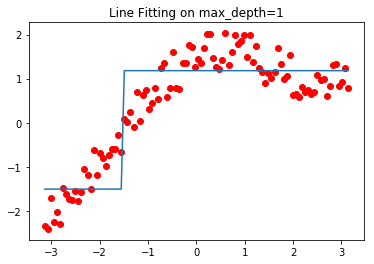

Square mean errer(train)= 0.2873268251459142
Square mean errer(test)= 0.3578163764242775
Square mean errer(validation)= 0.3448546866637093


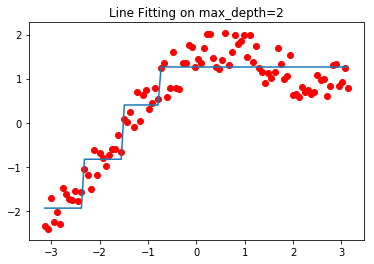

Square mean errer(train)= 0.16416696544237527
Square mean errer(test)= 0.10004064864060772
Square mean errer(validation)= 0.12162040825035637


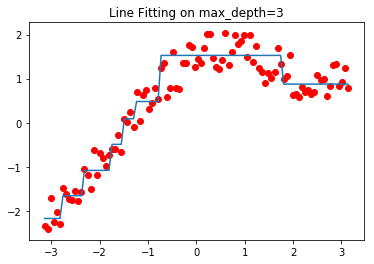

Square mean errer(train)= 0.074952786380083
Square mean errer(test)= 0.14001529878474836
Square mean errer(validation)= 0.13610078227878264


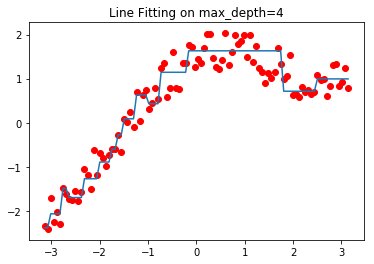

Square mean errer(train)= 0.04786851824716259
Square mean errer(test)= 0.18121286768583555
Square mean errer(validation)= 0.11524628170277348


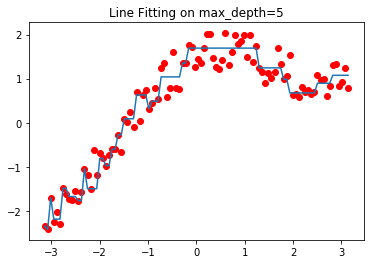

Square mean errer(train)= 0.03146181450285632
Square mean errer(test)= 0.189868789559987
Square mean errer(validation)= 0.07600453744839258


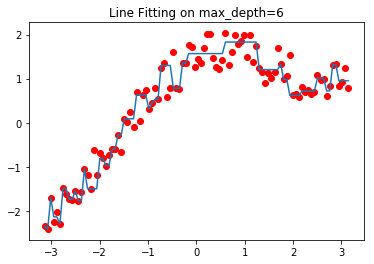

Square mean errer(train)= 0.01797759487623401
Square mean errer(test)= 0.22616590757376534
Square mean errer(validation)= 0.11184035837504244


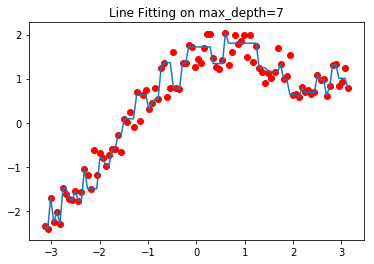

Square mean errer(train)= 0.010733918414218216
Square mean errer(test)= 0.2254137579156526
Square mean errer(validation)= 0.12719671325210524


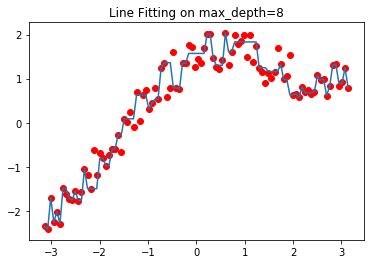

Square mean errer(train)= 0.0048883279455908405
Square mean errer(test)= 0.21893621135916422
Square mean errer(validation)= 0.11963007145354206


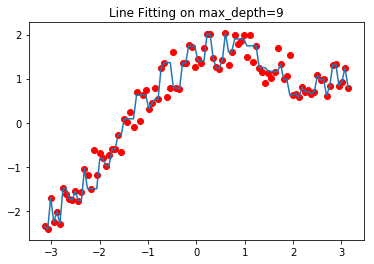

Square mean errer(train)= 0.002240076558709399
Square mean errer(test)= 0.21871641772939743
Square mean errer(validation)= 0.12852254581140185


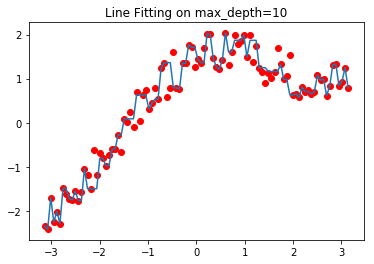

Square mean errer(train)= 0.0006759070678919992
Square mean errer(test)= 0.22761798319623358
Square mean errer(validation)= 0.12664973429789317


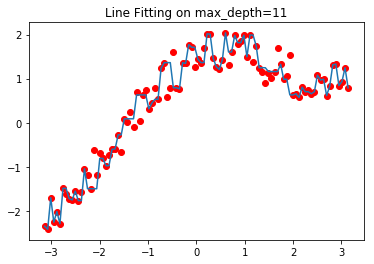

Square mean errer(train)= 1.9827208975100508e-05
Square mean errer(test)= 0.23646882742552264
Square mean errer(validation)= 0.12664973429789317


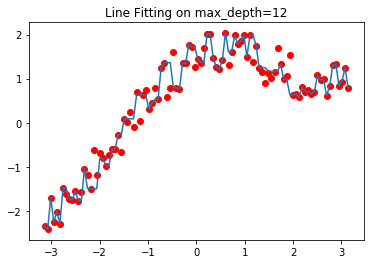

Square mean errer(train)= 0.0
Square mean errer(test)= 0.23646882742552264
Square mean errer(validation)= 0.12664973429789317


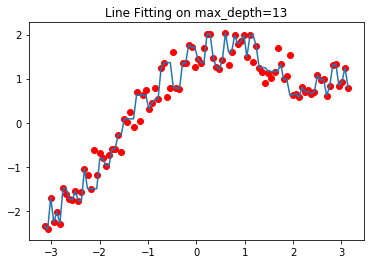

Square mean errer(train)= 0.0
Square mean errer(test)= 0.23646882742552264
Square mean errer(validation)= 0.12664973429789317


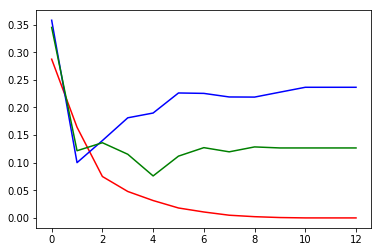

In [7]:
#variable declearition 
training_error = []
testing_error = []
validataton_erro = []

for i in range(1,14):
    #cereating the model instence with variable maximum depth
    model = tree.DecisionTreeRegressor(max_depth=i)
    
    #reshapeing the traind data to fin into the model
    x_train_fitting = np.matrix(x_train.reshape(len(x_train),1))
    y_train_fitting = np.matrix(y_train.reshape(len(y_train),1))
    
    #fitting the data in the model
    model.fit(x_train_fitting,y_train_fitting)
    
    #prideiction of model
    predict_model = model.predict(x.reshape(len(x),1))
    
    #ploting the curve
    plt.scatter(x,y,color="red")#plot y v/s x in dots
    plt.plot(x.reshape(len(x),1),predict_model)
    plt.title('Line Fitting on max_depth='+str(i))
    plt.show()
    
    #calcutaing error
    #square mean error for traning data
    mean_traning_error = np.mean((y_train - model.predict(x_train.reshape(len(x_train),1)))**2)
    print("Square mean errer(train)=",mean_traning_error)
    
    #square mean error for testing data
    mean_test_error = np.mean((y_test - model.predict(x_test.reshape(len(x_test),1)))**2)
    print("Square mean errer(test)=",mean_test_error)
    
    #square mean error for validition data
    mean_val_error = np.mean((y_val - model.predict(x_val.reshape(len(x_val),1)))**2)
    print("Square mean errer(validation)=",mean_val_error)
    
    #error matrix
    training_error.append(mean_traning_error)
    testing_error.append(mean_test_error)
    validataton_erro.append(mean_val_error)
    
#ploting error curve 
plt.figure()
plt.plot(training_error,c='red')
plt.plot(testing_error,c='blue')
plt.plot(validataton_erro,c='green')
plt.show()

